# Oversikt over Pandas-kommandoer ved bruk av 'penguins'-datasettet

I denne veiledningen skal vi bruke 'penguins'-datasettet fra seaborn-biblioteket for å demonstrere ulike pandas-kommandoer for sortering, gruppering, finne minimum og maksimum, telle antall og andre ofte brukte kommandoer. Vi vil også gi en oversikt over de mest brukte plottfunksjonene i seaborn.

In [1]:
# Importere nødvendige biblioteker og laste inn datasettet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Konfigurere visning av grafer i notebook
%matplotlib inline

# Laste inn 'penguins'-datasettet
df = sns.load_dataset('penguins')

# Vise de første fem radene
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Sortering av data

### Sortere etter én kolonne

In [2]:
# Sortere datasettet etter 'bill_length_mm' i stigende rekkefølge
df_sorted = df.sort_values(by='bill_length_mm')
df_sorted.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN


### Sortere etter flere kolonner

In [3]:
# Sortere etter 'species' og deretter 'bill_length_mm' i synkende rekkefølge
df_sorted_multi = df.sort_values(by=['species', 'bill_length_mm'], ascending=[True, False])
df_sorted_multi.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,Male
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male


## Gruppering av data

### Beregne gjennomsnitt per gruppe

In [4]:
# Beregne gjennomsnittlig 'bill_length_mm' for hver art
group_mean = df.groupby('species')['bill_length_mm'].mean()
group_mean

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

### Anvende flere aggregasjonsfunksjoner

In [5]:
# Beregne både gjennomsnitt og standardavvik for 'bill_length_mm' per art
group_stats = df.groupby('species')['bill_length_mm'].agg(['mean', 'std'])
group_stats

,mean,std
species,,
Adelie,38.791391,2.663405
Chinstrap,48.833824,3.339256
Gentoo,47.504878,3.081857


## Finne minimum og maksimum

### Finne maksimumsverdier

In [6]:
# Finne maksimum 'bill_length_mm' per art
max_values = df.groupby('species')['bill_length_mm'].max()
max_values

species
Adelie       46.0
Chinstrap    58.0
Gentoo       59.6
Name: bill_length_mm, dtype: float64

### Finne minimumsverdier

In [7]:
# Finne minimum 'bill_length_mm' per art
min_values = df.groupby('species')['bill_length_mm'].min()
min_values

species
Adelie       32.1
Chinstrap    40.9
Gentoo       40.9
Name: bill_length_mm, dtype: float64

## Telle antall

### Totalt antall observasjoner

In [8]:
# Telle totalt antall rader i datasettet
total_count = df.shape[0]
print("Totalt antall observasjoner:", total_count)

Totalt antall observasjoner: 344


### Antall per kategori

In [9]:
# Telle antall observasjoner per art
species_count = df['species'].value_counts()
species_count

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

## Andre ofte brukte pandas-kommandoer

### Filtrering av data

In [10]:
# Filtrere ut pingviner med 'bill_length_mm' større enn 45 mm
filtered_df = df[df['bill_length_mm'] > 45]
filtered_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,Male
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male


### Legge til nye kolonner

In [11]:
# Legge til en ny kolonne som beregner forholdet mellom 'bill_length_mm' og 'bill_depth_mm'
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2.238889
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.901554


### Håndtering av manglende verdier

In [12]:
# Sjekke for manglende verdier
missing_values = df.isnull().sum()
missing_values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
bill_ratio            2
dtype: int64

In [13]:
# Fjerne rader med manglende verdier
df_clean = df.dropna()
df_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2.238889
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.901554
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.907767


### Sammendrag av statistikk

In [14]:
# Generere en beskrivende statistikkrapport
stats_summary = df.describe()
stats_summary

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_ratio
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2.605649
std,5.459584,1.974793,14.061714,801.954536,0.497375
min,32.100000,13.100000,172.000000,2700.000000,1.639810
25%,39.225000,15.600000,190.000000,3550.000000,2.160344
50%,44.450000,17.300000,197.000000,4050.000000,2.575067
75%,48.500000,18.700000,213.000000,4750.000000,3.098777
max,59.600000,21.500000,231.000000,6300.000000,3.612676


## Oversikt over de mest brukte plottfunksjonene i seaborn

### Histogram

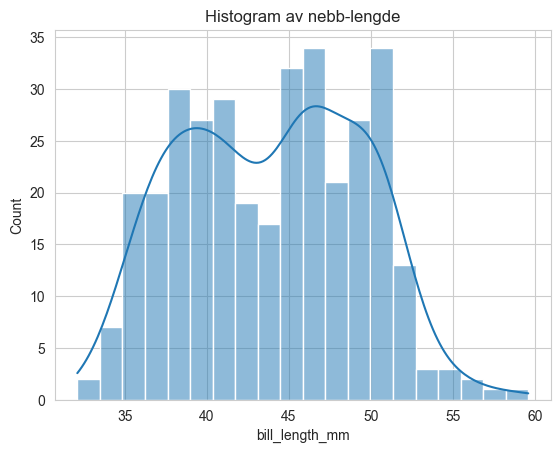

In [15]:
# Plot et histogram av 'bill_length_mm'
sns.histplot(data=df, x='bill_length_mm', bins=20, kde=True)
plt.title('Histogram av nebb-lengde')
plt.show()

### Scatterplot

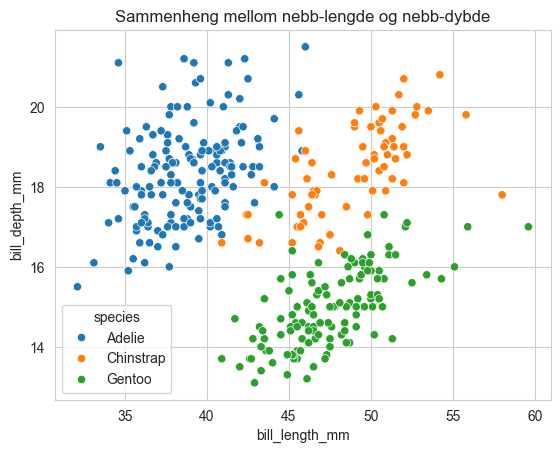

In [16]:
# Scatterplot av 'bill_length_mm' mot 'bill_depth_mm' farget etter art
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Sammenheng mellom nebb-lengde og nebb-dybde')
plt.show()

### Boxplot

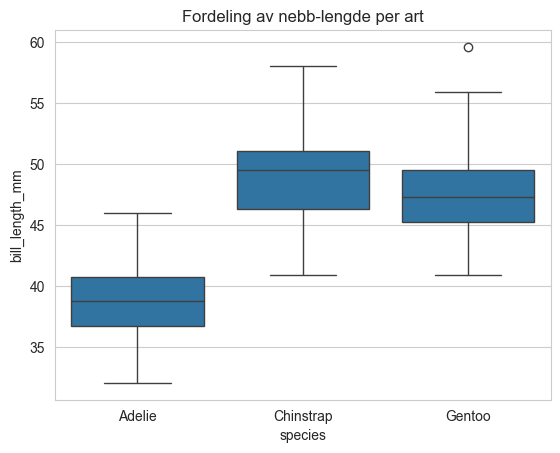

In [17]:
# Boxplot av 'bill_length_mm' per art
sns.boxplot(data=df, x='species', y='bill_length_mm')
plt.title('Fordeling av nebb-lengde per art')
plt.show()

### Violinplot

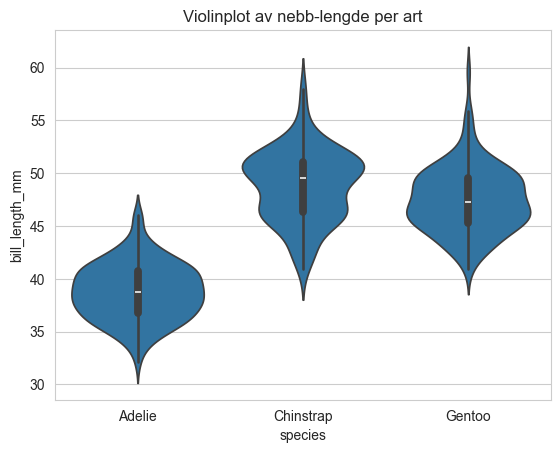

In [18]:
# Violinplot av 'bill_length_mm' per art
sns.violinplot(data=df, x='species', y='bill_length_mm')
plt.title('Violinplot av nebb-lengde per art')
plt.show()

### Heatmap

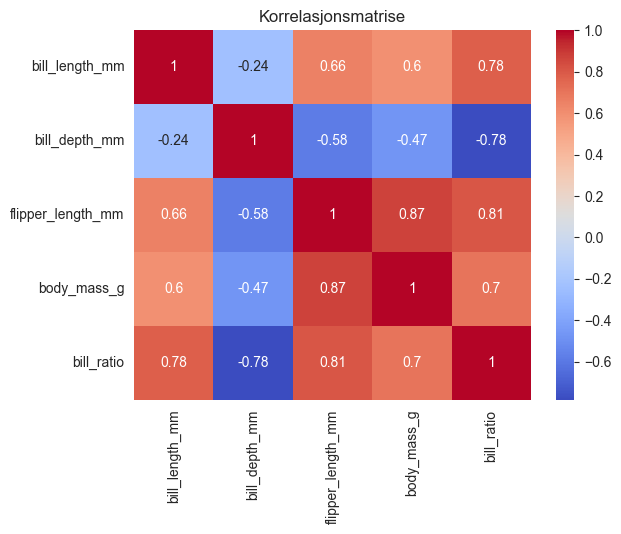

In [19]:
# Korrelasjonsmatrise
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korrelasjonsmatrise')
plt.show()

### Pairplot

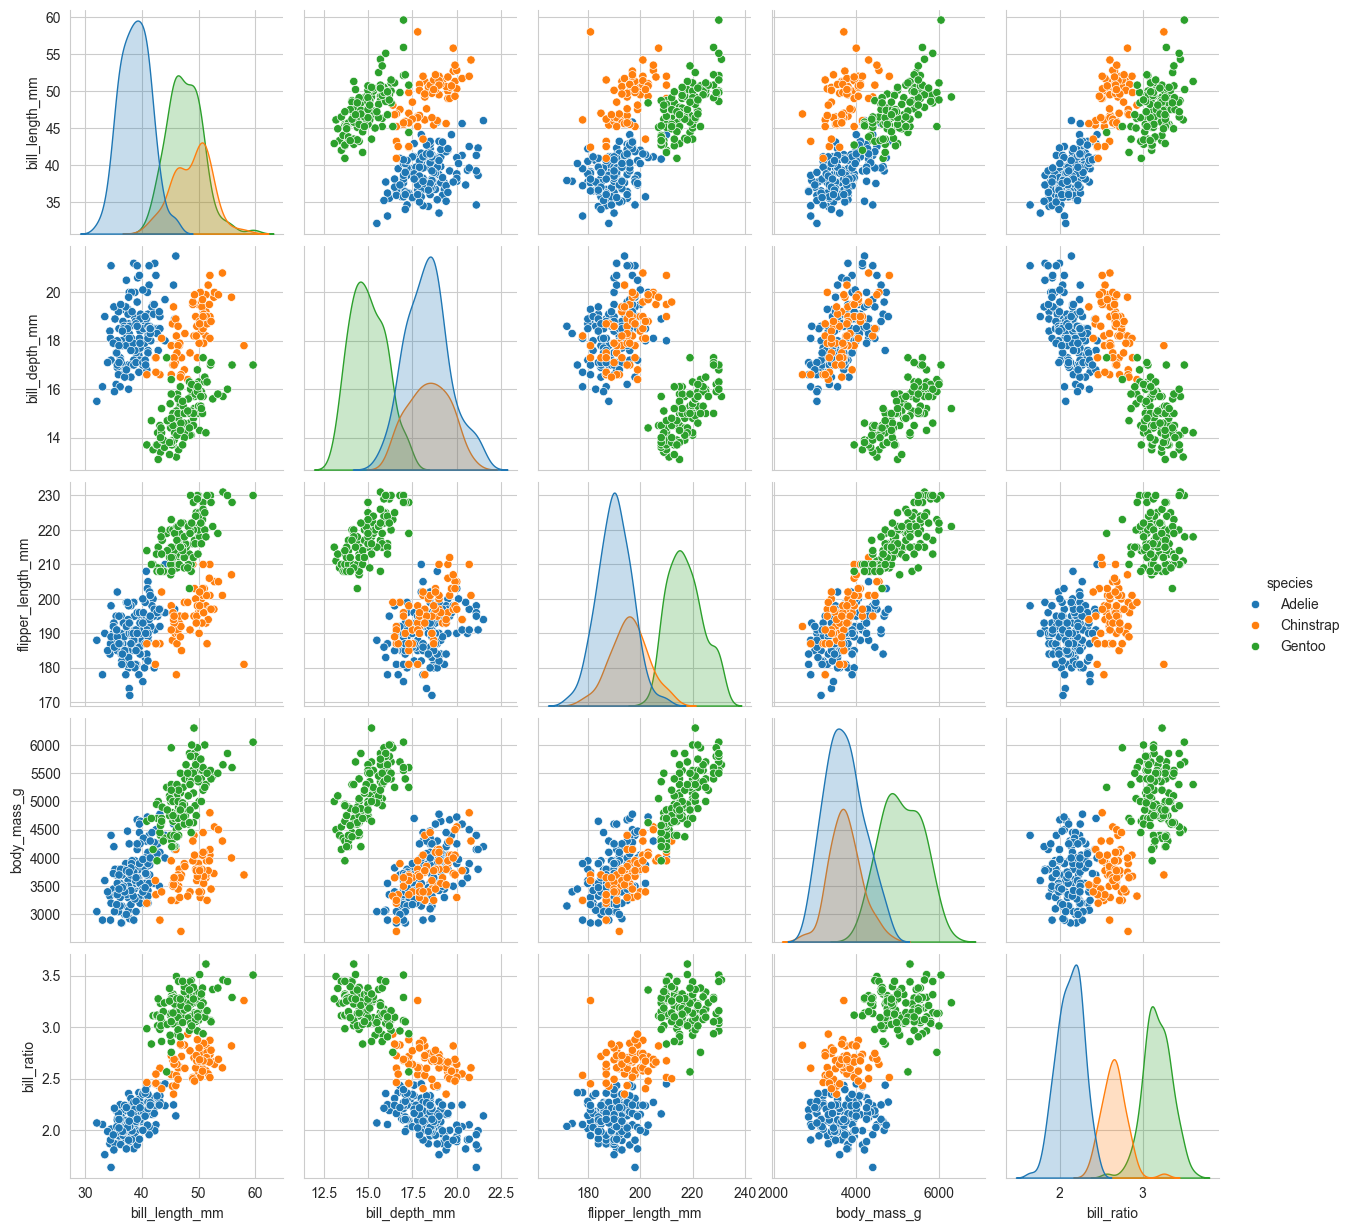

In [20]:
# Pairplot for numeriske variabler farget etter art
sns.pairplot(df.dropna(), hue='species')
plt.show()

### Barplot

C:\Users\mareis\AppData\Local\Temp\ipykernel_2208\4226709711.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='species', y='bill_length_mm', ci=None)


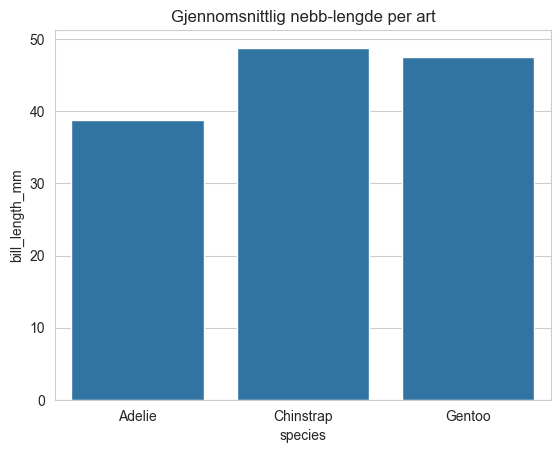

In [21]:
# Gjennomsnittlig 'bill_length_mm' per art
sns.barplot(data=df, x='species', y='bill_length_mm', ci=None)
plt.title('Gjennomsnittlig nebb-lengde per art')
plt.show()

### Lineplot

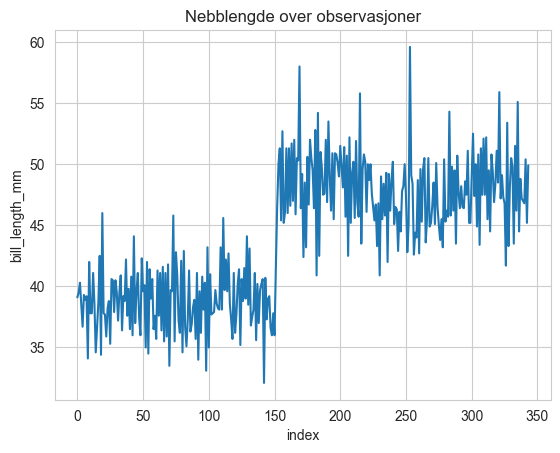

In [22]:
# Lineplot av 'bill_length_mm' over indeksene i datasettet
sns.lineplot(data=df.reset_index(), x='index', y='bill_length_mm')
plt.title('Nebblengde over observasjoner')
plt.show()

## Oppsummering

Denne veiledningen gir en oversikt over grunnleggende pandas-kommandoer for datahåndtering og analyse ved hjelp av 'penguins'-datasettet. Vi har dekket sortering, gruppering, beregning av min/maks, telling og filtrering, samt håndtering av manglende verdier. I tillegg har vi sett på de mest brukte plottfunksjonene i seaborn for å visualisere dataene på en informativ måte.

Disse verktøyene er essensielle for dataanalyse og kan tilpasses til et bredt spekter av datasett og analytiske behov.